# Gradient Descent Algorithm
* Gradinet descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiation function.
* The idea is to take repeated steps in the opposite direction of the gradient of the function at the current point because of steepest descent.

🔹 Gradient Descent with m & b

1. Initialize Parameters

    * Start with random values:
      
           m = 0,
           b = 0

2. Predict Values

       y_pred = m * x + b

   

4. Compute Loss (MSE)

       Loss = (1/n) * Σ (y - y_pred)²


5. Compute Gradients
   * Gradient wrt slope (m):

         dL/dm = (-2/n) * Σ ( (y - (m*x + b)) * x )

   * Gradient wrt bias (b):
  
         dL/db = (-2/n) * Σ ( y - (m*x + b) )


6. Update Parameters

       m = m - α * (dL/dm)
       b = b - α * (dL/db)

      (where α = learning rate)


7. Repeat Steps 2–5

    * For multiple epochs until parameters converge.

8. Convergence

    * (m, b) → values that minimize the Loss.

    * Path = sliding down a 3D bowl-shaped surface.





In [1]:
# Importing Libraries

import numpy as numpy
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [2]:
# Creating data 

x , y = make_regression(n_samples = 4, n_features = 1, n_informative = 1, n_targets = 1, noise = 70, random_state = 30)

In [3]:
x

array([[ 1.52790535],
       [ 0.47055962],
       [-1.26405266],
       [-0.97071094]])

In [4]:
y

array([  45.16447856,   26.6858963 ,  -88.71545753, -165.99399306])

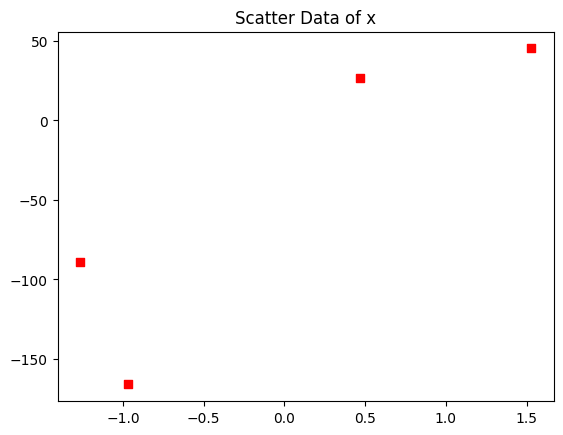

In [5]:
# plotting the dataset
plt.scatter(x, y, marker='s', color = 'red')
plt.title("Scatter Data of x")
plt.show()

In [6]:
# Linear Regression Model

reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [7]:
reg.coef_       # Slope (m) of the regression line

array([67.69587248])

In [8]:
reg.intercept_   # Intercept (b) of the resgression line

-41.715658363640735

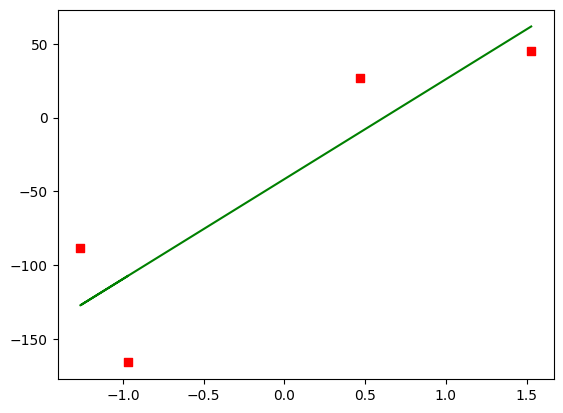

In [9]:
# Plotting the Regression Line

plt.scatter(x, y, marker = 's', color = 'red')
plt.plot(x, reg.predict(x), color = 'green', label = 'Regression')
plt.show()

In [10]:
# Gradient Descent application

class GDAlgo:
    def __init__(self, learning_rate, epochs):
        self.m = 1
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs
    def algorithm(self,x,y):
        for epoch in range(self.epochs):
            y_pred = self.m*x.ravel()+self.b
            error = y - y_pred

            # Calculating dl/db and dl/dm
            dm = -2*np.sum((y-self.m*x.ravel()-self.b)*x.ravel())
            db = -2*np.sum(y-self.m*x.ravel()-self.b)

            # Upating slope and bias
            self.m = self.m - (self.lr*dm)
            self.b = self.b - (self.lr*db)

            print(f'slope : {self.m}  bias : {self.b}')
            plt.scatter(x, y, marker = 's', color = 'red')
            plt.plot(x,self.m*x.ravel()+self.b, color = 'yellow', alpha = 0.5)
        plt.plot(x, 67.69587248*x.ravel()+(-41.715658363640735), color = 'green', label = 'Regression Line')
        plt.legend()
        plt.show()
        

In [11]:
gd = GDAlgo(0.08, 10) 

In [12]:
gd.algorithm(x,y)

NameError: name 'np' is not defined

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

def plot_loss_surface(x, y):
    m_values = np.linspace(50, 85, 100)   # range of slopes
    b_values = np.linspace(-80, 0, 100)   # range of intercepts
    M, B = np.meshgrid(m_values, b_values)

    # Calculate loss for each (m, b)
    Z = np.zeros_like(M)
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            y_pred = M[i, j] * x.ravel() + B[i, j]
            Z[i, j] = np.mean((y - y_pred) ** 2)

    # Plot 3D surface
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, B, Z, cmap='viridis', alpha=0.7)

    ax.set_xlabel("Slope (m)")
    ax.set_ylabel("Bias (b)")
    ax.set_zlabel("Loss (MSE)")
    ax.set_title("3D Loss Surface for Linear Regression")
    plt.show()


In [ ]:
plot_loss_surface(x, y)
